In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#raw_data 불러오기
path = '/content/drive/MyDrive/신용카드AI/'
valid_raw = pd.read_csv(path+'val.csv')
train_raw = pd.read_csv(path+'train.csv')
test_raw = pd.read_csv(path+'test.csv')

#features와 target분리, ID열 제거거

valid_features = valid_raw.drop(['ID','Class'],axis=1)
valid_target = valid_raw[['Class']]

train_features = train_raw.drop('ID',axis=1)
train_ID = train_raw[['ID']]

test_features = test_raw.drop('ID',axis=1)
test_ID = test_raw[['ID']]

In [ ]:
train_adasyn1 = pd.read_csv(path+'ADASYN/train_adasyn1.csv',index_col=0)
print(train_adasyn1.shape,train_raw.shape, valid_raw.shape, test_raw.shape)
train_adasyn1.head()

(227503, 31) (113842, 31) (28462, 32) (142503, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960,0
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901,0
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901,0


In [ ]:
# x, y 정의
X_train=train_adasyn1.drop('Class',axis=1)
y_train=train_adasyn1[['Class']]

# 모델 정의, 학습
xgb_clf = XGBClassifier(n_estimators=2000, 
                        max_depth=6, 
                        subsample=0.5, 
                        learning_rate=0.1, 
                        objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        gpu_id=0, 
                        random_state=0)
xgb_clf.fit(X_train,y_train)

# 예측
train_pred = xgb_clf.predict(X_train)
f1_score(y_train, train_pred, average='macro')

# 모델 검증
X_val = valid_features
y_val = valid_target
val_pred = xgb_clf.predict(X_val)
f1_origin=f1_score(y_val, val_pred, average='macro')
print('f1 score : '+ str(f1_origin))

f1 score : 0.896129704996047


In [11]:
#train_adasyn2
train_adasyn2 = pd.read_csv(path+'ADASYN/train_adasyn2.csv',index_col=0)
print(train_adasyn2.shape,train_raw.shape, valid_raw.shape, test_raw.shape)
train_adasyn2.head()

(227503, 31) (113842, 31) (28462, 32) (142503, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960,0
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901,0
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901,0


In [12]:
# x, y 정의
X_train=train_adasyn2.drop('Class',axis=1)
y_train=train_adasyn2[['Class']]

# 모델 정의, 학습
xgb_clf = XGBClassifier(n_estimators=2000, 
                        max_depth=6, 
                        subsample=0.5, 
                        learning_rate=0.1, 
                        objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        gpu_id=0, 
                        random_state=0)
xgb_clf.fit(X_train,y_train)

# 예측
train_pred = xgb_clf.predict(X_train)
f1_score(y_train, train_pred, average='macro')

# 모델 검증
X_val = valid_features
y_val = valid_target
val_pred = xgb_clf.predict(X_val)
f1_origin=f1_score(y_val, val_pred, average='macro')
print('f1 score : '+ str(f1_origin))

f1 score : 0.9073194875902806


In [7]:
#train_adasyn3
train_adasyn3 = pd.read_csv(path+'ADASYN/train_adasyn3.csv',index_col=0)
print(train_adasyn3.shape,train_raw.shape, valid_raw.shape, test_raw.shape)
train_adasyn3.head()

(227498, 31) (113842, 31) (28462, 32) (142503, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960,0
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901,0
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901,0


In [9]:
# x, y 정의
X_train=train_adasyn3.drop('Class',axis=1)
y_train=train_adasyn3[['Class']]

# 모델 정의, 학습
xgb_clf = XGBClassifier(n_estimators=2000, 
                        max_depth=6, 
                        subsample=0.5, 
                        learning_rate=0.1, 
                        objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        gpu_id=0, 
                        random_state=0)
xgb_clf.fit(X_train,y_train)

# 예측
train_pred = xgb_clf.predict(X_train)
f1_score(y_train, train_pred, average='macro')

# 모델 검증
X_val = valid_features
y_val = valid_target
val_pred = xgb_clf.predict(X_val)
f1_origin=f1_score(y_val, val_pred, average='macro')
print('f1 score : '+ str(f1_origin))

f1 score : 0.9073194875902806


In [13]:
# scatterplot 제작용 df 생성
# 기존 valid features + 기존 valid class
valid_df=pd.concat([valid_features,valid_target],axis=1)
valid_df

# 기존 valid features + 예측 valid class
valid_pred_df = pd.DataFrame(np.concatenate((valid_raw.iloc[:,1:-1].values, val_pred.reshape(-1, 1)), axis=1), columns = valid_raw.drop('ID',axis=1).columns)
valid_pred_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0.0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0.0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0.0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0.0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0.0


# train3으로 진행한 시각화

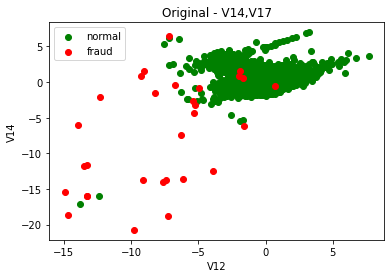

In [16]:
plt.scatter(valid_df[valid_df['Class']==0].V14, valid_df[valid_df['Class']==0].V17, color='green', label= 'normal')
plt.scatter(valid_df[valid_df['Class']==1].V14, valid_df[valid_df['Class']==1].V17, color='red', label= 'fraud')
plt.xlabel('V12')
plt.ylabel('V14')
plt.title('Original - V14,V17')
plt.legend()
plt.show()

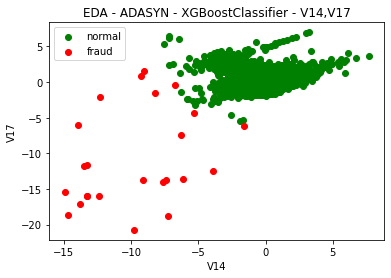

In [22]:
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].V14, valid_pred_df[valid_pred_df['Class']==0].V17, color='green', label= 'normal')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].V14, valid_pred_df[valid_pred_df['Class']==1].V17, color='red', label= 'fraud')
plt.xlabel('V14')
plt.ylabel('V17')
plt.title('EDA - ADASYN - XGBoostClassifier - V14,V17')
plt.legend()
plt.show()

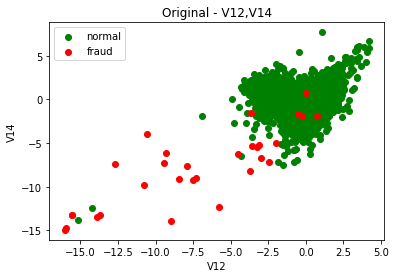

In [18]:
plt.scatter(valid_df[valid_df['Class']==0].V12, valid_df[valid_df['Class']==0].V14, color='green', label= 'normal')
plt.scatter(valid_df[valid_df['Class']==1].V12, valid_df[valid_df['Class']==1].V14, color='red', label= 'fraud')
plt.xlabel('V12')
plt.ylabel('V14')
plt.title('Original - V12,V14')
plt.legend()
plt.show()

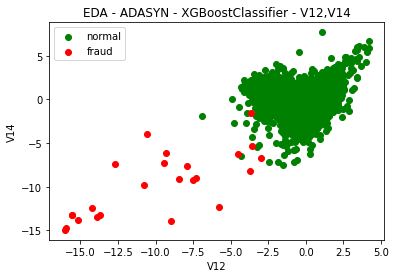

In [23]:
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].V12, valid_pred_df[valid_pred_df['Class']==0].V14, color='green', label= 'normal')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].V12, valid_pred_df[valid_pred_df['Class']==1].V14, color='red', label= 'fraud')
plt.xlabel('V12')
plt.ylabel('V14')
plt.title('EDA - ADASYN - XGBoostClassifier - V12,V14')
plt.legend()
plt.show()

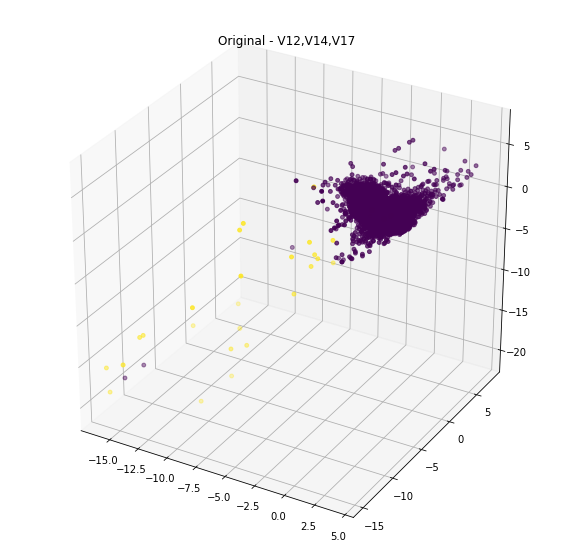

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valid_df.V12, valid_df.V14, valid_df.V17, c=valid_df.Class, marker='o', s=15)
plt.title('Original - V12,V14,V17')
plt.show()

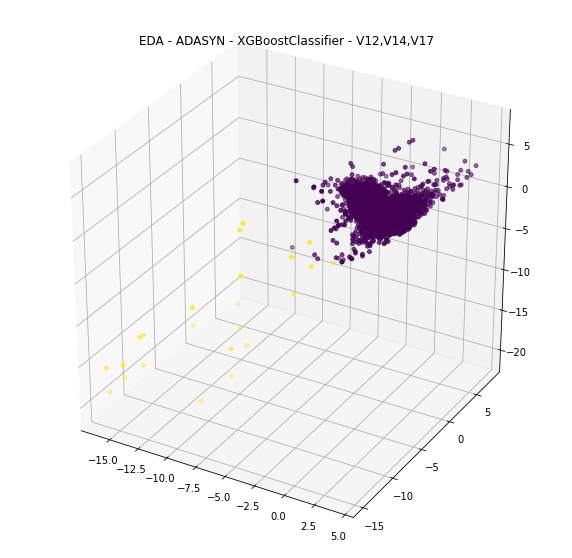

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valid_pred_df.V12, valid_pred_df.V14, valid_pred_df.V17, c=valid_pred_df.Class, marker='o', s=15)
plt.title('EDA - ADASYN - XGBoostClassifier - V12,V14,V17')
plt.show()